## Submit job

In [8]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from src.adapter import QuriAdapter, collect_payloads_from_job

DEVICE = "anemone"
PROGRAM = "chevron_pattern"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{DEVICE}/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

print("sample:", payloads[:3], f"... len={len(payloads)}")


job_id = 068e743d-c25f-72dc-8000-c8b122ff0102
job_status = succeeded  elapsed=546.088
sample: [{'time_range': [0.0, 8.0, 16.0, 24.0, 32.0, 40.0, 48.0, 56.0, 64.0, 72.0, 80.0, 88.0, 96.0, 104.0, 112.0, 120.0, 128.0, 136.0, 144.0, 152.0, 160.0, 168.0, 176.0, 184.0, 192.0, 200.0, 208.0, 216.0, 224.0, 232.0, 240.0, 248.0, 256.0, 264.0, 272.0, 280.0, 288.0, 296.0, 304.0, 312.0, 320.0, 328.0, 336.0, 344.0, 352.0, 360.0, 368.0, 376.0, 384.0, 392.0, 400.0], 'detuning_range': [-0.05, -0.048, -0.046, -0.044, -0.042, -0.04, -0.038, -0.036, -0.034, -0.032, -0.03, -0.028, -0.026, -0.024, -0.022, -0.02, -0.018, -0.016, -0.014, -0.012, -0.01, -0.008, -0.006, -0.004, -0.002, 0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.032, 0.034, 0.036, 0.038, 0.04, 0.042, 0.044, 0.046, 0.048, 0.05], 'frequencies': {'Q08': 8.195345886548736}, 'chevron_data': {'Q08': [[0.9712730050086975, 1.1348860263824463, 1.1302119493484497, 1.152519941329956, 1.030043

## Plot

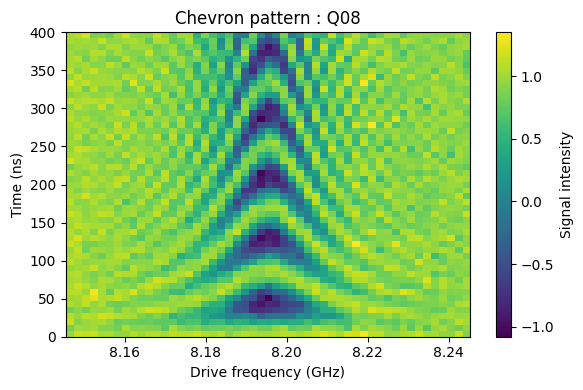

In [12]:
from src.plotters import plot_payload

p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)